# **Introduction** :
Les équations de Lotka-Volterra, ou “modèle proie-prédateur”, sont couramment utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un prédateur et sa proie interagissent dans un milieu commun. Elles ont été proposées indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s’écrivent de la manière suivante:

\begin{align*}
\dot{x}_1 &= x_1 (\alpha - \beta x_2) \\
\dot{x}_2 &= -x_2 (\gamma - \delta x_1) \\
\end{align*}

où $x_1$ et $x_2$ désignent le nombre (positif) de proies et de prédateurs respectivement et $\alpha$, $\beta$, $\gamma$, $\delta$ sont des paramètres strictement positifs.

### Introduction des variables et des fonctions utiles au projet :
Commençons par importer les modules Python qui serviront par la suite.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import exp

Puis créons les variables et les fonctions de l'énoncé.

In [2]:
alpha = 0.5
beta = 0.5
gamma = 0.5
delta = 0.5

def LV(t, x):
    x1 = x[0]
    x2 = x[1]
    return np.array([x1*(alpha - beta*x2), -x2*(gamma - delta*x1)])

def H(x1,x2):
    return(delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2))


## **Question 1 :** 
Donner une interprétation physique à chaque terme de la dynamique. Montrer qu’il existe deux points d’équilibre $(0, 0)$ et $\bar{x} \in \mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$. Que peut-on dire de leur stabilité à ce stade ?

### Réponse 1 :

L'équation différentielle s'écrit :

$$
\left(\begin{array}{cc} 
\dot{x_1}(t)\\
\dot{x_2}(t)
\end{array}\right)
= f(t,x)
$$
avec
$$
f(t,x)=
\left(\begin{array}{cc} 
x_1(\alpha - \beta x_2)\\
-x_2(\gamma - \delta x_1)
\end{array}\right)
, \ 
x = 
\left(\begin{array}{cc} 
x_1\\
x_2
\end{array}\right)
$$


Les termes présents dans cette équation différentielle sont des réels de $]0,1]$ qui représentent un taux (pourcentage) : 

- $\alpha$ : taux de reproduction des proies
- $\beta$ : taux de prédation (plus ce taux est élevé, plus les prédateurs sont aptes à capturer des proies)
- $\gamma$ : taux de mortalité des prédateurs
- $\delta$ : taux de nutrition des proies (plus ce taux est élevé, plus les prédateurs sont aptes à survivre en mangeant une proie)

Les points d'équilibre vérifient :
$\dot{x_1}$ $=$ $\dot{x_2}$ $= 0$ 

$x_1(\alpha - \beta x_2) = 0 \\
x_2(\gamma - \delta x_1) = 0$

$x_1 = x_2 = 0 \ \ \ 
ou \ \ \ 
x_1 = \frac{\gamma}{\delta} \ et \ x_2 = \frac{\alpha}{\beta}$ 

Les points d'équilibre sont donc $(0,0)$ et $\bar{x}$=$(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$.

Si on calcule le Jacobien de f en ces points on a : 
$$
J_f(x) =
\left(\begin{array}{cc} 
\alpha - \beta x_2 & -\beta x_1\\
\delta x_2 & -\gamma + \delta x_1
\end{array}\right)
$$ 
Ce qui donne :
$$
J_f(0) =
\left(\begin{array}{cc} 
\alpha & 0\\
\ 0 & -\gamma
\end{array}\right)
$$

$$
J_f(\bar{x}) =
\left(\begin{array}{cc} 
\ 0 & -\frac{\beta \gamma}{\delta} \\
\ \frac{\delta \alpha}{\beta} & 0
\end{array}\right)
$$

La matrice jacobienne en 0 a pour valeurs propres $\alpha > 0$ et $-\gamma < 0$, donc 0 n'est pas stable.

La matrice jacobienne en $\bar{x}$ est semblable à la matrice diagonale :


$$
\left(\begin{array}{cc} 
i \sqrt{\alpha \gamma} & 0\\
\ 0 & -i \sqrt{\alpha \gamma}
\end{array}\right)
$$


dont les valeurs propres sont imaginaires pures, donc on ne peut pas coclure quant à la stabilité de $\bar{x}$.

## **Question 2 :**
A l’aide des fonctions meshgrid et quiver, visualiser graphiquement le champ de vecteurs. Intuiter le comportement des solutions. On pourra aussi utiliser streamplot pour visualiser le portrait de phase.

### Réponse 2 :
On remarque que les solutions orbitent autour du point d'équilibre $\bar x$, on peut donc intuiter que les solutions sont périodiques.

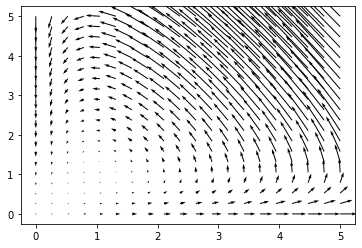

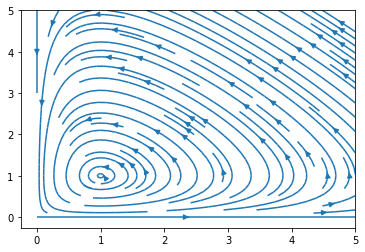

In [3]:
x1 = np.linspace(0,5,20)
x2 = np.linspace(0,5,20)

X = np.meshgrid(x1, x2)

U, V = LV(0, X)

plt.quiver(X[0], X[1], U, V, scale=50)
plt.show()

plt.streamplot(X[0], X[1], U, V)
plt.show()

## **Question 3 :**
Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$ reste dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$ sur son ensemble de définition.

### Réponse 3 :
$f$ est polynomiale donc elle est $C^\infty$ sur $\mathbb{R} \times \mathbb{R^2}$. On peut donc appliquer le théorème de Cauchy-Lipschitz. 
Soit $(t_0,x_0) \in \mathbb{R} \times (\mathbb{R^*_+})^2$, considérons l'unique solution $x(t)$ du problème de Cauchy de conditions initiales $(t_0,x_0)$. Supposons par l'absurde qu'il existe $t_1 > t_0$ tel que $x(t_1) \notin \mathbb{R^*_+}^2$. Distinguons les cas :
- Si $x_1(t_1) \leqslant 0 , \exists t_2 \in [t_0,t_1]$ tel que $x_1(t_2) = 0$ \
La fonction 
$\tilde{x}(t) = (0, x_2(t_2)e^{-\gamma (t-t_2)})$ est l'unique solution du problème de Cauchy de condition initiale $(t_2,x(t_2))$. Comme $x$ est solution du même problème de Cauchy, on a $\tilde{x} = x$ ce qui est absurde car $x(t_0) \not = \tilde{x}(t_0)$.

- De même, si $x_2(t_1) \leqslant 0 , \exists t_2 \in [t_0,t_1]$ tel que $x_2(t_2) = 0$ \
La fonction 
$\tilde{x}(t) = (x_2(t_2)e^{\alpha (t-t_2)}, 0)$ est l'unique solution du problème de Cauchy de condition initiale $(t_2,x(t_2))$. Comme $x$ est solution du même problème de Cauchy, on a $\tilde{x} = x$ ce qui est absurde car $x(t_0) \not = \tilde{x}(t_0)$.

On en déduit donc que si $(t_0,x_0) \in \mathbb{R} \times \mathbb{R^*_+}^2$, alors $\forall t \in I$, $x(t) \in \mathbb{R^*_+}^2$ avec $x : I \mapsto \mathbb{R^2}$ solution maximale du problème de Cauchy de condition initiale $(t_0,x_0)$.

## **Question 4 :**
On considère la fonction $$H(x_1, x_2) = \delta x_1 − \gamma \ln{x_1} + \beta x_2 − \alpha \ln{x_2}$$ 
définie sur $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$. Calculer la dérivée de $H$ le long des solutions initialisées dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$. En déduire que toute solution maximale initialisée dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$ est définie sur $\mathbb{R}$.

### Réponse 4 :


## Question 5 :
Représenter les courbes de niveau de $H$. Où se trouve $\bar{x}$ ? Qu’en conclue-t-on sur le comportement des solutions ? En déduire (graphiquement) que $\bar{x}$ est stable, au sens de la définition de stabilité.

### Réponse 5 :

<ipython-input-2-81cf913bc9a6>:12: RuntimeWarning: divide by zero encountered in log
  return(delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2))


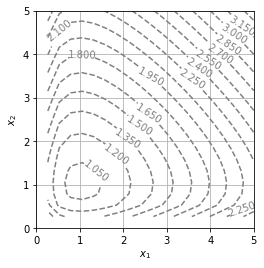

In [6]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
    plt.show();


display_contour(H, x1, x2, 15)

## Question 6 : 
Coder une fonction du type


$\text{def  solve_euler_explicit }(f, x_0, dt, t_0, t_f): \\
...\\
\text{return  } t, x$


prenant en entrée une fonction $ f : \mathbb{R}\times\mathbb{R}^n \longrightarrow \mathbb{R}^n$ quelconque, une condition initiale $x_0$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^j$ et de la solution $x^j$ du schéma d’Euler explicite appliqué à $\dot{x} = f(t, x)$. La tester sur une équation différentielle aux solutions exactes connues. Vérifier la convergence du schéma lorsque $dt$ tend vers 0. Comment visualiser graphiquement l’ordre de convergence ?

### Réponse 6 :

In [8]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    x = np.zeros(shape=(round((tf-t0)/dt) + 1, np.shape(x0)[0]))
    x[0] = x0
    t = [t0]
    for i in range(round((tf-t0)/dt)): 
        t_new = t[i] + dt
        x_new = x[i] + dt*f(t[i], x[i])
        x[i+1] = x_new
        t.append(t_new)
    return t, x

On peut tester l'algorithme d'Euler pour l'équation $\dot x(t) + x(t) = 0$

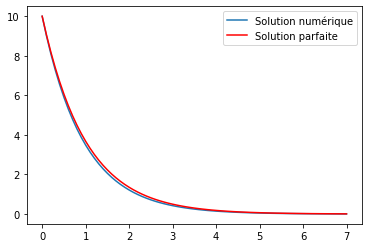

In [39]:
def test(t, x): #test pour l'équation différentielle x'(t) + x(t) = 0
    return(- x)

x0 = [10]
t0 = 0
tf = 7
dt = 0.1

t, x = solve_euler_explicit(test, x0, dt, t0, tf)
x_parfait = x0[0]*(np.exp(t))**(-1)

plt.plot(t, x, label = "Solution numérique")
plt.plot(t, x_parfait, c='r', label = "Solution parfaite")
plt.legend()
plt.show()

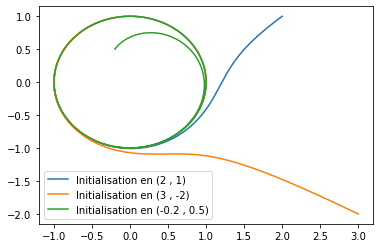

In [18]:
def orbite(t, x):
    return np.array([x[0] + x[1] - x[0]*(x[0]*x[0] + x[1]*x[1]), -x[0] + x[1] - x[1]*(x[0]*x[0] + x[1]*x[1])])

t, x = solve_euler_explicit(orbite, [2, 1], 0.001, 0, 10)
plt.plot(x[:,0], x[:,1], label="Initialisation en (2 , 1)")
t, x = solve_euler_explicit(orbite, [3, -2], 0.001, 0, 10)
plt.plot(x[:,0], x[:,1], label="Initialisation en (3 , -2)")
t, x = solve_euler_explicit(orbite, [-0.2, 0.5], 0.001, 0, 10)
plt.plot(x[:,0], x[:,1], label="Initialisation en (-0.2 , 0.5)")
plt.legend()
plt.show()

#### Visualisation graphique de l'ordre de convergence : 
Coder la réponse théorique markdown

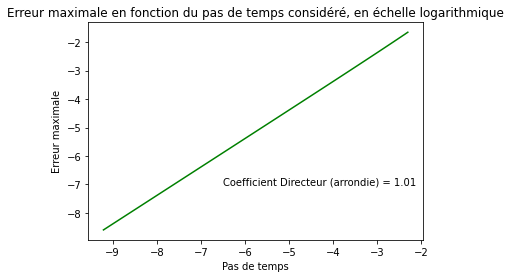

In [40]:
#on détermine l'erreur max et l'indice qui va avec:
def erreur_max(x0, x, t0, tf, dt):
    err_max = 0
    i_err = 0
    for i in range(round((tf-t0)/dt)) :
        err = abs(x[i] - x0[0]*exp(-(t0 + i*dt)))
        if err > err_max:
            err_max = err 
            i_err = i
    return(i_err, err_max) #le couple obtenu dépend du pas de temps 

#on trace l'erreur max en fonction du pas de temps:

x0 = [10]
t0 = 0
tf = 10
dt_min = 10**(-4)
dt_max = 10**(-1)
n = 100
list_dt = np.linspace(dt_min, dt_max, n)
list_err = np.zeros(n)
i = 0


for dt in list_dt: #on calcule l'erreur max pour chaque pas de temps et on créé le vecteur tab_err qui contient les erreurs max
    t, x = solve_euler_explicit(test, x0, dt, t0, tf)
    list_err[i] = erreur_max(x0, x, t0, tf, dt)[1]
    i += 1

plt.text(-6.5, -7, f"Coefficient Directeur (arrondie) = {round(np.polyfit(np.log(list_dt), np.log(list_err), 1)[0], 3)}") #donne le coeff directeur
plt.plot(np.log(list_dt), np.log(list_err), c='green')
plt.title("Erreur maximale en fonction du pas de temps considéré, en échelle logarithmique")
plt.xlabel("Pas de temps")
plt.ylabel("Erreur maximale")
plt.show()

## Question 7 :
Utiliser le schéma d’Euler explicite pour simuler les équations de Lotka-Volterra. Que constate-t-on en temps long ? Cette résolution vous semble-t-elle fidèle à la réalité ? On pourra tracer l’évolution de la fonction $H$.

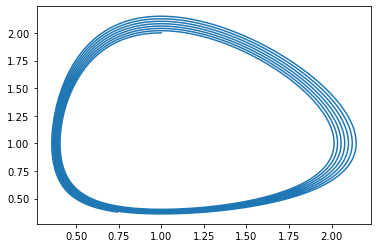

In [33]:
x0 = [1, 2]
t0 = 0
tf = 100
dt = 0.01

t, x = solve_euler_explicit(LV, x0, dt, t0, tf)

plt.plot(x.T[0], x.T[1])
plt.show();

## Question 8 :
Coder maintenant une fonction du type

$\text{def  solve_euler_implicit }(f, x_0, dt, t_0, t_f, intermax = 100): \\
...\\
\text{return  } t, x$


donnant la solution d’un schéma d’Euler implicite appliqué à $\dot{x} = f(t, x)$ selon la méthode présentée dans le cours. Vérifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois-ci sur les équations de Lotka-Volterra ?


In [34]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):

    t , x_exp = solve_euler_explicit(f, x0, dt, t0, tf)
    x = np.zeros(shape=(round((tf-t0)/dt) + 1, 2))
    x[0] = x0
    eps = 0.01
    for i in range(round((tf-t0)/dt)): 
        
        #calcul de x_new:
        def F(x_new):
            return np.array(x[i] + dt*f(t[i], x_new)) #fonction dont on cherche le point fixe x_new
        
        x_ref = x_exp[i+1] #valeur reference calculee avec l'algo de Euler explicite 
        iteration = 0
        x_new = F(x_ref)
        err = np.linalg.norm((x_new - x_ref)/x_ref)
        while iteration < itermax and err > eps: #soit l'erreur est inferieure au seuil, soit on atteint le nb max d'iteration
            err = np.linalg.norm((F(x_new) - x_new)/x_ref)
            iteration += 1
            x_new = F(x_new) #on itere 
        x[i+1] = x_new
    return t, x

Testons cet algorithme sur le même exemple que précédemment : $ \dot x(t) + x(t) = 0$.

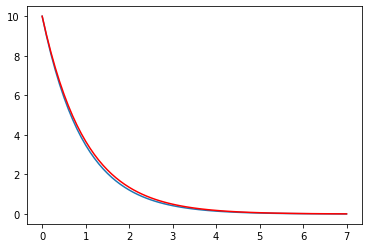

In [42]:
x0 = [10]
t0 = 0
tf = 7
dt = 0.1

t, x = solve_euler_explicit(test, x0, dt, t0, tf)
x_parfait = x0[0]*(np.exp(t))**(-1)

plt.plot(t, x, label = "solution numérique")
plt.plot(t, x_parfait, c='r', label = "Solution parfaite")
plt.show()

Comparons maintenant les applications des deux algorithmes de Euler aux équations de Lokta-volterra : 

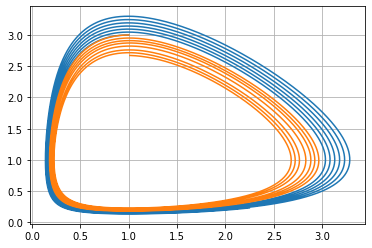

In [44]:
x0 = [1, 3]
t0 = 0
tf = 100
dt = 0.01

t, x_exp = solve_euler_explicit(LV, x0, dt, t0, tf)
t, x_imp = solve_euler_implicit(LV, x0, dt, t0, tf)

plt.plot(x_exp.T[0], x_exp.T[1])
plt.plot(x_imp.T[0], x_imp.T[1]) 
plt.grid()
plt.show() #on affiche explicite et implicite

Regardons l'évolution de la fonction $H$ : 

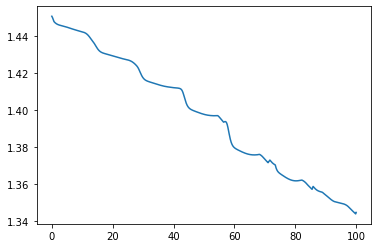

In [45]:
plt.plot(t, H(x_imp.T[0], x_imp.T[1]))
plt.show()

#### 9. Expliquer pourquoi les solutions de 

\begin{align*}
\dot{x}_1 &= x_1 (\alpha - \beta x_2) - u_1(x_1,x_2)(H(x_1,x_2)-H_0)\\
\dot{x}_2 &= -x_2 (\gamma - \delta x_1) - u_2(x_1,x_2)(H(x_1,x_2)-H_0) \\
\end{align*}

#### sont identiques à celles de Lotka-Volterra si $H_0 = H(x(0))$ pour tout choix de $u : \mathbb{R}^2 \rightarrow \mathbb{R}^2$ continûment différentiable.

#### 10. Soit $H_0 \in \mathbb{R}$. Calculer la dérivée de $H-H_0$ le long des solutions de ce nouveau système. Montrer que l'on peut choisir $u$ tel que

\begin{align*}
\ \frac{d}{dt}(H(x(t))-H_0)&= -k \|\nabla H(x(t)) \|^{2}(H(x(t))-H_0) \\
\end{align*}

#### En déduire qu'alors $H(x(t))$ converge exponentiellement vers $H_0$ lorsque $t$ tend vers l'infini si $x$ reste à une distance strictement positive de $\bar{x}$.